In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Crytocurrency Data

In [3]:
cryptocurrencies = ['BTC-USD', 'ETH-USD']

In [24]:
data = yf.download(cryptocurrencies, start='2020-01-01', end='2020-12-31')
data.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                    Close                     High  \
                BTC-USD     ETH-USD      BTC-USD     ETH-USD      BTC-USD   
Date                                                                        
2020-01-01  7200.174316  130.802002  7200.174316  130.802002  7254.330566   
2020-01-02  6985.470215  127.410179  6985.470215  127.410179  7212.155273   
2020-01-03  7344.884277  134.171707  7344.884277  134.171707  7413.715332   
2020-01-04  7410.656738  135.069366  7410.656738  135.069366  7427.385742   
2020-01-05  7411.317383  136.276779  7411.317383  136.276779  7544.497070   

                                Low                     Open              \
               ETH-USD      BTC-USD     ETH-USD      BTC-USD     ETH-USD   
Date                                                                       
2020-01-01  132.835358  7174.944336  129.198288  7194.892090  129.630661   
2020-01-02  130.820038  6935.270020  126.954910  7202.551270  130.820038   
2020-01-03  134.554016  6914.996094  126.490021  6984.428711  127.411263   
2020-01-04  136.052719  7309.514160  133.040558  7345.375488  134.168518   
2020-01-05  139.410202  7400.535645  135.045624  7410.451660  135.072098   

                 Volume               
                BTC-USD      ETH-USD  
Date                                  
2020-01-01  18565664997   7935230330  
2020-01-02  20802083465   8032709256  
2020-01-03  28111481032  10476845358  
2020-01-04  18444271275   7430904515  
2020-01-05  19725074095   7526675353

In [25]:
data.isnull().any()

Adj Close  BTC-USD    False
           ETH-USD    False
Close      BTC-USD    False
           ETH-USD    False
High       BTC-USD    False
           ETH-USD    False
Low        BTC-USD    False
           ETH-USD    False
Open       BTC-USD    False
           ETH-USD    False
Volume     BTC-USD    False
           ETH-USD    False
dtype: bool

In [26]:
adj_close=data['Adj Close']

bitcoin_prices = adj_close['BTC-USD']
print(bitcoin_prices.head())
ethereum_prices = adj_close['ETH-USD']
print(ethereum_prices.head())

Date
2020-01-01    7200.174316
2020-01-02    6985.470215
2020-01-03    7344.884277
2020-01-04    7410.656738
2020-01-05    7411.317383
Name: BTC-USD, dtype: float64
Date
2020-01-01    130.802002
2020-01-02    127.410179
2020-01-03    134.171707
2020-01-04    135.069366
2020-01-05    136.276779
Name: ETH-USD, dtype: float64


# Adjusted Closing Price

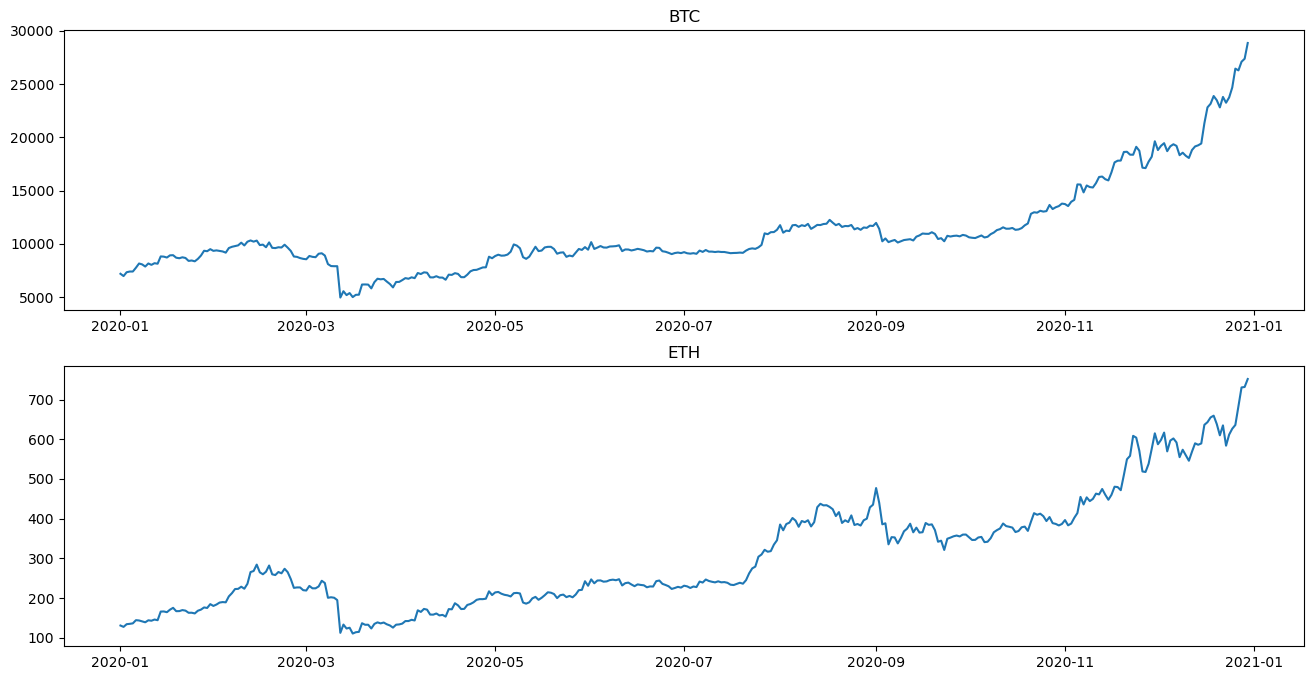

In [27]:
fig, axs =plt.subplots(2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(adj_close['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

# Moving Average

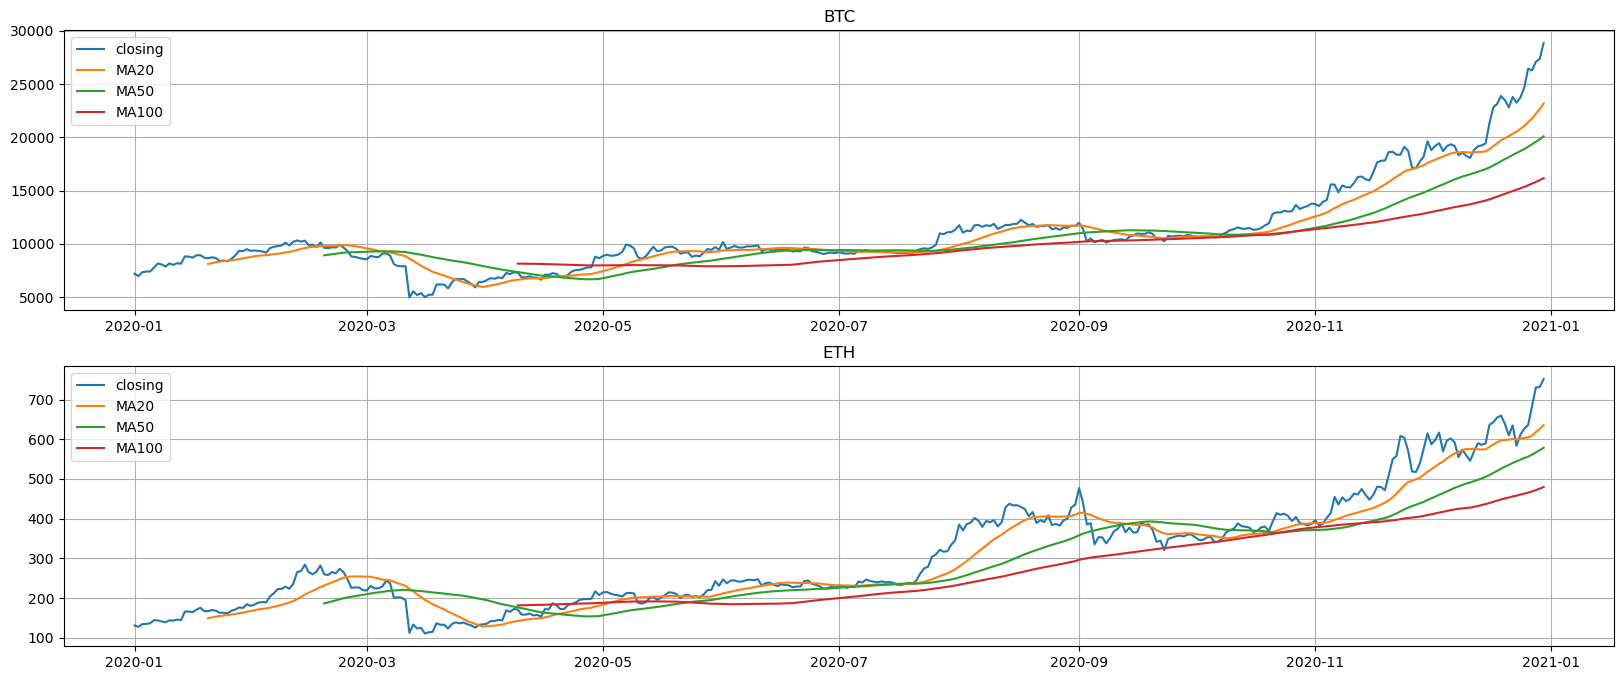

In [28]:
MA20 = adj_close.rolling(20).mean()
MA50 = adj_close.rolling(50).mean()
MA100 = adj_close.rolling(100).mean()

fig, axs = plt.subplots(2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(MA20['BTC-USD'], label= 'MA20')
axs[0].plot(MA50['BTC-USD'], label= 'MA50')
axs[0].plot(MA100['BTC-USD'], label= 'MA100')
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(MA20['ETH-USD'], label= 'MA20')
axs[1].plot(MA50['ETH-USD'], label= 'MA50')
axs[1].plot(MA100['ETH-USD'], label= 'MA100')
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
plt.show()

# CDC Action Zone

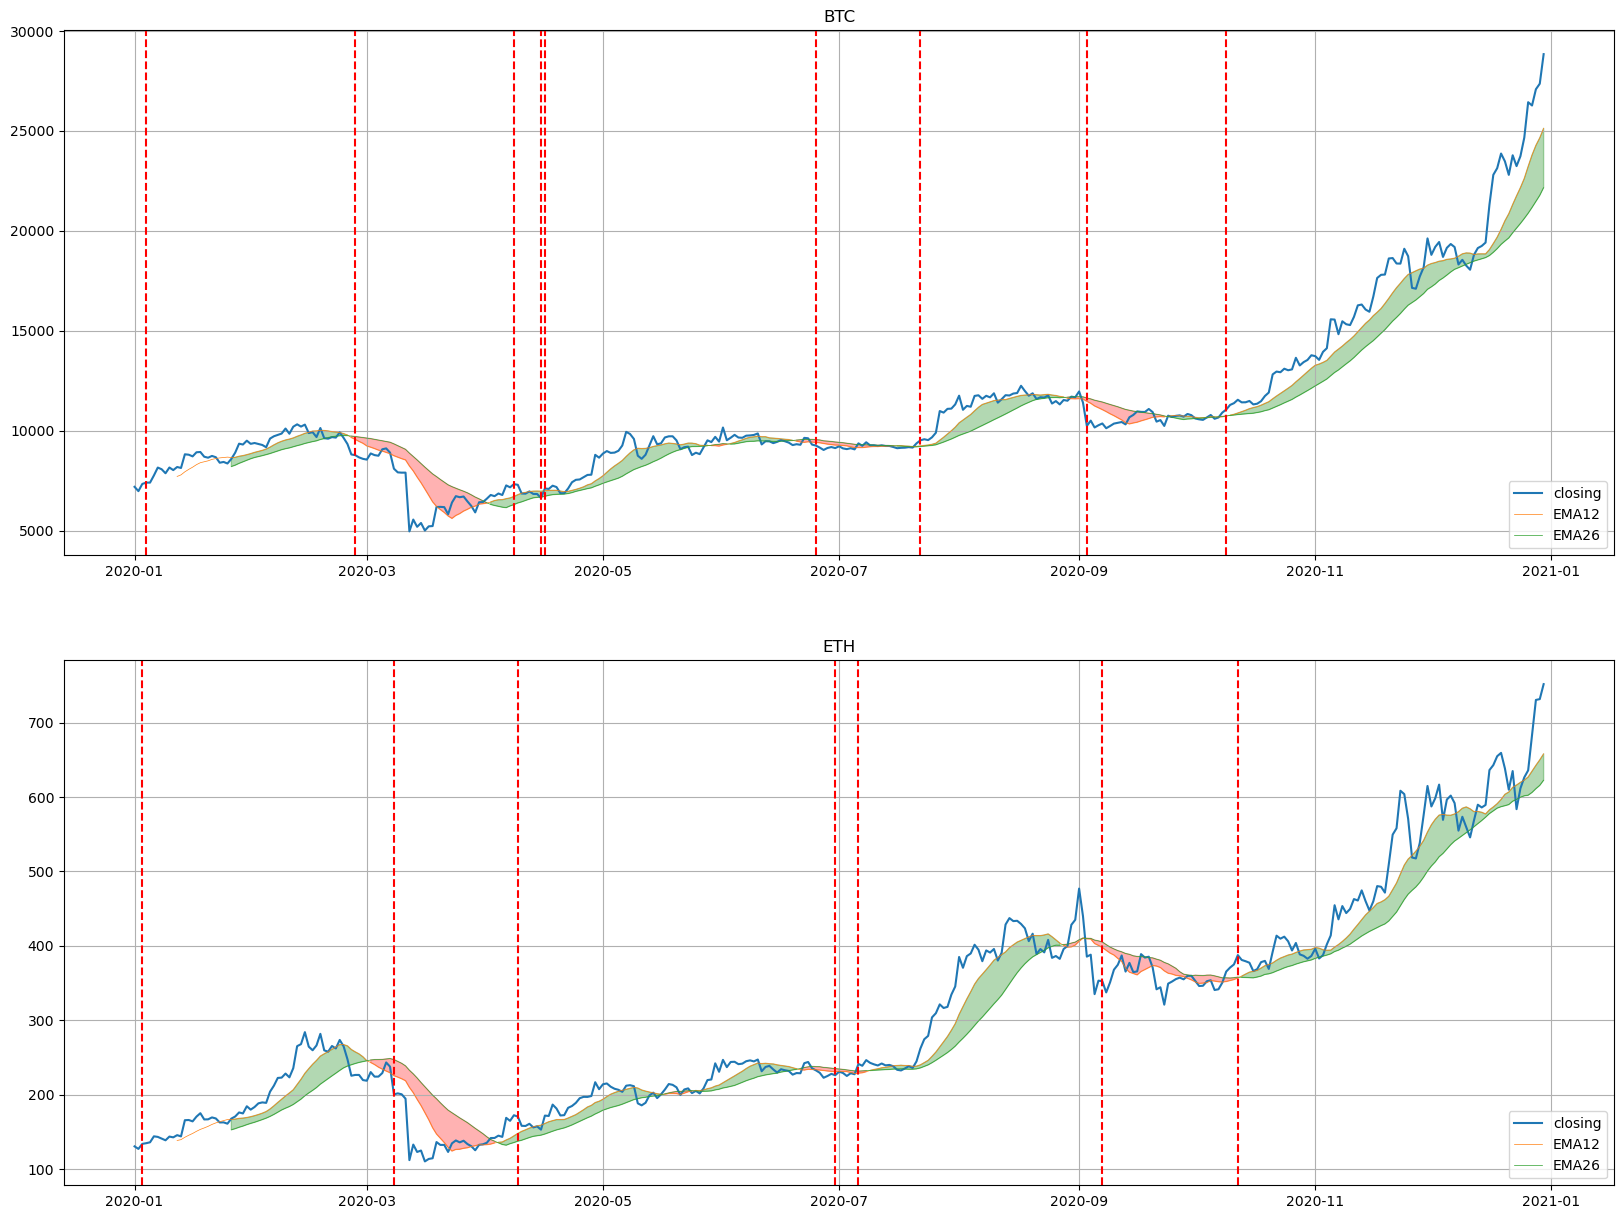

In [44]:
EMA12 = adj_close.ewm(span=12, adjust=False).mean()
EMA26 = adj_close.ewm(span=26, adjust=False).mean()

btc_crossings = np.where(np.logical_xor(EMA12['BTC-USD'] > EMA26['BTC-USD'], EMA12['BTC-USD'].shift(1) > EMA26['BTC-USD'].shift(1)))[0]
eth_crossings = np.where(np.logical_xor(EMA12['ETH-USD'] > EMA26['ETH-USD'], EMA12['ETH-USD'].shift(1) > EMA26['ETH-USD'].shift(1)))[0]

fig, axs = plt.subplots(2,figsize=(20,15),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(MA12['BTC-USD'], label= 'EMA12', linewidth = 0.5)
axs[0].plot(MA26['BTC-USD'], label= 'EMA26', linewidth = 0.5)
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[0].fill_between(adj_close.index, MA12['BTC-USD'], MA26['BTC-USD'], where=(MA12['BTC-USD'] > MA26['BTC-USD']), color='green', alpha=0.3)
axs[0].fill_between(adj_close.index, MA12['BTC-USD'], MA26['BTC-USD'], where=(MA12['BTC-USD'] <= MA26['BTC-USD']), color='red', alpha=0.3)
for crossing in btc_crossings:
    axs[0].axvline(x=EMA12.index[crossing], color='r', linestyle='--')

axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(MA12['ETH-USD'], label= 'EMA12', linewidth = 0.5)
axs[1].plot(MA26['ETH-USD'], label= 'EMA26', linewidth = 0.5)
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
axs[1].fill_between(adj_close.index, MA12['ETH-USD'], MA26['ETH-USD'], where=(MA12['ETH-USD'] > MA26['ETH-USD']), color='green', alpha=0.3)
axs[1].fill_between(adj_close.index, MA12['ETH-USD'], MA26['ETH-USD'], where=(MA12['ETH-USD'] <= MA26['ETH-USD']), color='red', alpha=0.3)
for crossing in eth_crossings:
    axs[1].axvline(x=EMA12.index[crossing], color='r', linestyle='--')

plt.show()